<a href="https://colab.research.google.com/github/deNzik3/data_analytics_projects/blob/main/weather_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Overview
#In this project, we'll predict tomorrow's temperature using historical data. We'll start by downloading a dataset of local weather. You can customize this to your own location. Then, we'll clean the data and get it ready for machine learning. We'll build a system to make historical predictions. Then, we'll add more predictors to improve the model. We'll end with how to make next-day predictions.



**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**

In [ ]:
weather = pd.read_csv("weather.csv", index_col="DATE")

In [ ]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",20.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",90.0,100.0,NaN,NaN,NaN,0.05,0.4,0.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",20.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data cleaning and preparation

**Percentage of missing val in each col**

In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.502175
ACSH       0.502149
AWND       0.264834
FMTM       0.475769
PGTM       0.349643
PRCP       0.000000
SNOW       0.000000
SNWD       0.000026
TAVG       0.679455
TMAX       0.000000
TMIN       0.000000
TSUN       0.997774
WDF1       0.599177
WDF2       0.497929
WDF5       0.500337
WDFG       0.659910
WDFM       0.903101
WESD       0.683882
WSF1       0.599073
WSF2       0.497929
WSF5       0.500362
WSFG       0.599151
WSFM       0.903101
WT01       0.656208
WT02       0.952211
WT03       0.931811
WT04       0.982267
WT05       0.981257
WT06       0.990525
WT07       0.994641
WT08       0.776043
WT09       0.994305
WT11       0.999146
WT13       0.893290
WT14       0.955576
WT15       0.997825
WT16       0.664104
WT17       0.996971
WT18       0.937610
WT19       0.999741
WT21       0.999819
WT22       0.997437
WV01       0.999974
WV20       0.999974
dtype: float64

In [ ]:
valid_columns = weather.columns[null_pct < .05]

In [ ]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
weather = weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33


In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [ ]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [ ]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [ ]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
       '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17'],
      dtype='object', name='DATE', length=38628)

In [ ]:
weather.index = pd.to_datetime(weather.index)

In [ ]:
weather.index.year.value_counts().sort_index()

1970    730
1971    730
1972    732
1973    730
1974    730
1975    730
1976    732
1977    730
1978    730
1979    730
1980    732
1981    730
1982    730
1983    730
1984    732
1985    730
1986    730
1987    730
1988    732
1989    730
1990    730
1991    730
1992    732
1993    730
1994    730
1995    730
1996    732
1997    730
1998    730
1999    730
2000    732
2001    730
2002    730
2003    730
2004    732
2005    730
2006    730
2007    730
2008    732
2009    730
2010    730
2011    730
2012    732
2013    730
2014    730
2015    730
2016    732
2017    730
2018    730
2019    730
2020    732
2021    730
2022    642
Name: DATE, dtype: int64

**Data Visualization**

Text(0.5, 1.0, 'Temp min distribution by year')

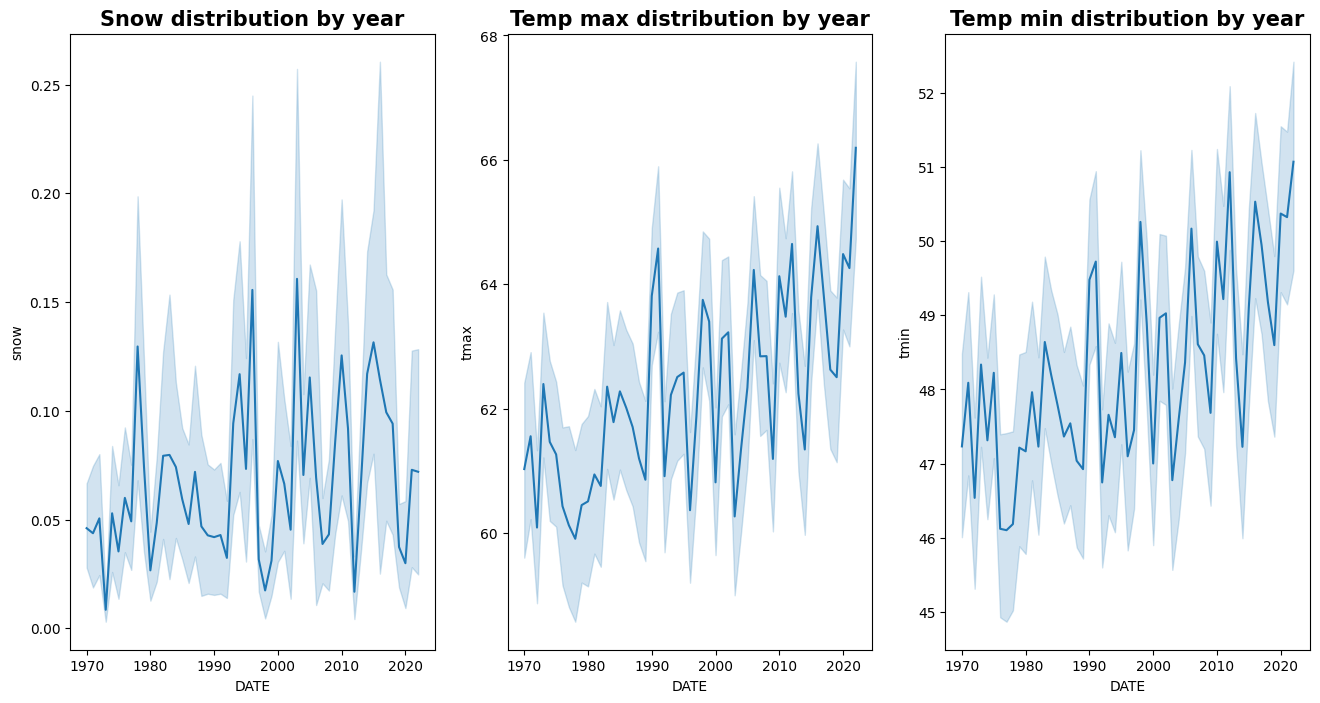

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (16,8))

sns.lineplot(ax = axes[0], data = weather, x = weather.index.year, y = 'snow')
sns.lineplot(ax = axes[1], data = weather, x = weather.index.year,y = 'tmax')
sns.lineplot(ax = axes[2], data = weather, x = weather.index.year,y = 'tmin')

axes[0].set_title("Snow distribution by year",size = 15,weight = 'heavy')
axes[1].set_title("Temp max distribution by year",size = 15,weight = 'heavy')
axes[2].set_title("Temp min distribution by year",size = 15,weight = 'heavy')

In [ ]:
weather["target"] = weather.shift(-1)["tmax"]

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21,29.0
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19,35.0
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26,30.0
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22,35.0
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21,35.0
...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,47.0
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,46.0
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,53.0


In [ ]:
weather = weather.ffill()    #fill in the last NaN value

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,28,21,29.0
1970-01-02,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,29,19,35.0
1970-01-03,USW00014732,"LAGUARDIA AIRPORT, NY US",0.05,0.4,0.0,35,26,30.0
1970-01-04,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,30,22,35.0
1970-01-05,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,35,21,35.0
...,...,...,...,...,...,...,...,...
2022-11-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.09,0.0,0.0,61,42,47.0
2022-11-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,35,46.0
2022-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.43,0.0,0.0,46,33,53.0


**Importing libraries for our model**

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

#First model

In [ ]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []   #creating an empty list of predictions
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]          #creating a training dataset
        test = weather.iloc[i:(i+step),:]   #creating a test dataset
        
        model.fit(train[predictors], train["target"])       #model training
        
        preds = model.predict(test[predictors])             #creating a prediction 
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()     #different between actual data and predicted data
        
        all_predictions.append(combined)          #adding information to dataset 
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(weather, rr, predictors)

#Model evaluation

**Importing libraries for model evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.32361855380997

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1977-04-11,90.0,50.341915,39.658085
1994-01-27,56.0,21.915387,34.084613
2014-04-30,77.0,44.609946,32.390054
1990-03-12,83.0,52.891214,30.108786
1994-01-16,45.0,16.205939,28.794061
...,...,...,...
2005-05-22,64.0,64.000955,0.000955
1993-12-30,32.0,31.999247,0.000753
1985-01-09,29.0,28.999299,0.000701


#Let's upgrade it

In [ ]:
pd.Series(rr.coef_, index=predictors)

prcp   -1.365862
snow   -0.335672
snwd    0.059205
tmax    0.452233
tmin    0.518670
dtype: float64

In [ ]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):         #function for rolling averages 
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [ ]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

#Model evaluation

In [ ]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.106398872726372

In [ ]:
mean_squared_error(predictions["actual"], predictions["prediction"])

42.2142895286877

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1977-04-11,90.0,53.339810,36.660190
1994-01-27,56.0,22.050308,33.949692
1990-03-12,83.0,50.313197,32.686803
1990-03-12,85.0,54.659202,30.340798
1998-03-26,80.0,50.530783,29.469217
...,...,...,...
1996-08-18,82.0,82.001192,0.001192
1994-03-19,46.0,46.001034,0.001034
2017-09-21,81.0,81.000964,0.000964


In [ ]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,1.0,27,13,36.0,29.000000,-0.068966,17.666667,-0.264151,0.000000,0.0,28.642857,-0.057357,18.428571,-0.294574,0.032143,-1.000000
1970-01-16,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,36,20,46.0,29.666667,0.213483,15.666667,0.276596,0.000000,0.0,29.142857,0.235294,18.500000,0.081081,0.032143,-1.000000
1970-01-17,USW00014732,"LAGUARDIA AIRPORT, NY US",0.04,0.0,0.0,46,34,43.0,36.333333,0.266055,22.333333,0.522388,0.013333,2.0,29.928571,0.536993,19.071429,0.782772,0.031429,0.272727
1970-01-18,USW00014732,"LAGUARDIA AIRPORT, NY US",0.02,0.0,0.0,43,23,23.0,41.666667,0.032000,25.666667,-0.103896,0.020000,0.0,30.857143,0.393519,19.142857,0.201493,0.032857,-0.391304
1970-01-19,USW00014732,"LAGUARDIA AIRPORT, NY US",0.00,0.0,0.0,23,14,22.0,37.333333,-0.383929,23.666667,-0.408451,0.020000,-1.0,30.000000,-0.233333,18.642857,-0.249042,0.032857,-1.000000


#Model visualization

<Axes: title={'center': 'Diff distribution'}>

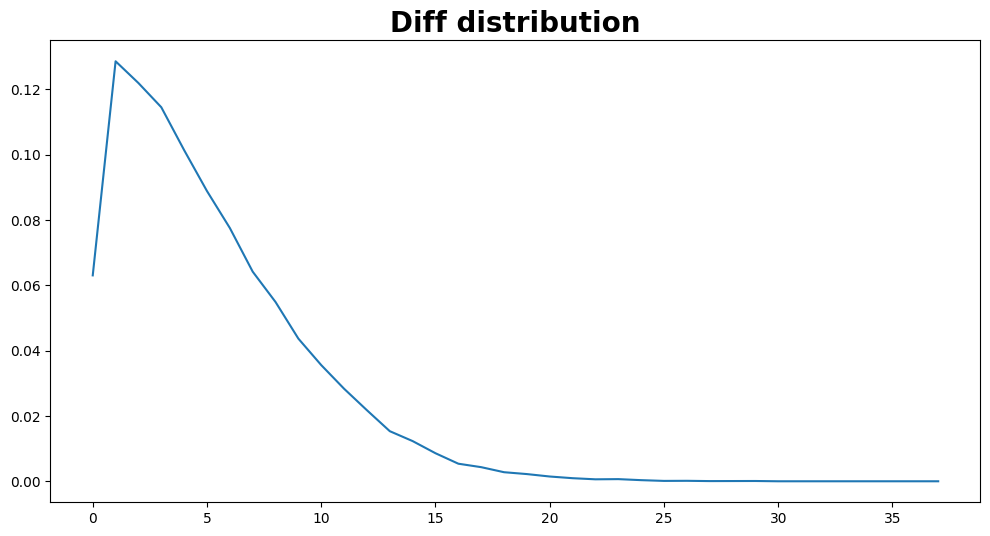

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Diff distribution",size = 20, weight = 'bold')
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

<Axes: title={'center': 'Model visualization'}, xlabel='DATE', ylabel='actual'>

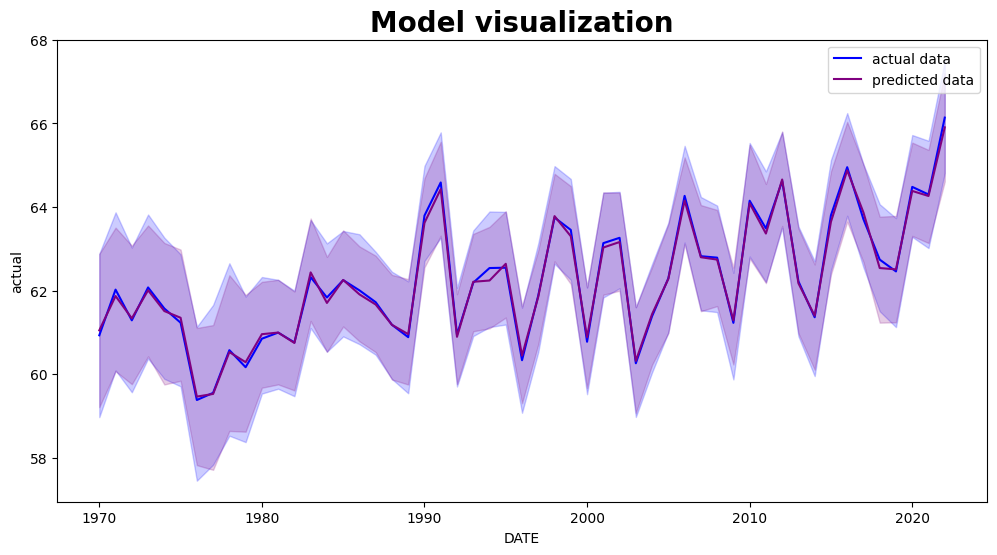

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Model visualization",size = 20,weight = 'heavy')
sns.lineplot(data = predictions, x = predictions.index.year, y = 'actual',color = 'blue',label ="actual data")
sns.lineplot(data = predictions, x = predictions.index.year, y = 'prediction', color = 'purple', label = "predicted data")

**As we can see, the model predicts the future temperature well.**